In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from scipy.signal import savgol_filter  
import folium 
from folium.plugins import MiniMap, Fullscreen
import matplotlib.gridspec as gridspec  

In [76]:
file_path = "/Users/arjun/Downloads/Pharmacy_OLTP_SLStyle_18Months.csv"
sales = pd.read_csv(file_path)
sales.head()
print("Total rows:", len(sales))

Total rows: 50000


In [77]:
print(sales.columns.tolist())  # List of all column names
print("\nNumber of columns:", len(sales.columns))
num_cols = len(sales.columns)

['Transaction_ID', 'Transaction_Date', 'Branch_ID', 'Branch_Name', 'District', 'Province', 'Payment_Method', 'Customer_Gender', 'Customer_Age', 'Customer_City', 'Medicine_ID', 'Medicine_Name', 'Generic_Name', 'Medicine_Category', 'Dosage_Form', 'Strength_mg', 'Pack_Size', 'Supplier_Name', 'Prescription_Required', 'Batch_No', 'Expiry_Date', 'Quantity', 'Unit_Price_LKR', 'Discount_Rate', 'Line_Total_LKR', 'Year', 'Month']

Number of columns: 27


**EDA**

In [78]:
#null value check
print(sales.isnull().sum()) #results shows Strength_mg has 31236 null values

print((sales.isnull().sum() / len(sales) * 100).round(2))
#62.47 % null values in that one colomn only

Transaction_ID               0
Transaction_Date             0
Branch_ID                    0
Branch_Name                  0
District                     0
Province                     0
Payment_Method               0
Customer_Gender              0
Customer_Age                 0
Customer_City                0
Medicine_ID                  0
Medicine_Name                0
Generic_Name                 0
Medicine_Category            0
Dosage_Form                  0
Strength_mg              31236
Pack_Size                    0
Supplier_Name                0
Prescription_Required        0
Batch_No                     0
Expiry_Date                  0
Quantity                     0
Unit_Price_LKR               0
Discount_Rate                0
Line_Total_LKR               0
Year                         0
Month                        0
dtype: int64
Transaction_ID            0.00
Transaction_Date          0.00
Branch_ID                 0.00
Branch_Name               0.00
District                  

In [79]:
#duplicate check
print("Duplicate rows:", sales.duplicated().sum())


Duplicate rows: 0


In [80]:
print(sales.describe())

       Transaction_ID     Branch_ID  Customer_Age   Medicine_ID   Strength_mg  \
count    50000.000000  50000.000000  50000.000000  50000.000000  18764.000000   
mean     25000.500000      4.001940     48.915940     74.543920    350.273129   
std      14433.901067      2.004319     18.159583     42.797969    308.811764   
min          1.000000      1.000000     18.000000      1.000000     50.000000   
25%      12500.750000      2.000000     33.000000     37.000000    100.000000   
50%      25000.500000      4.000000     49.000000     74.000000    250.000000   
75%      37500.250000      6.000000     65.000000    112.000000    500.000000   
max      50000.000000      7.000000     80.000000    148.000000   1000.000000   

          Pack_Size      Quantity  Unit_Price_LKR  Discount_Rate  \
count  50000.000000  50000.000000    50000.000000   50000.000000   
mean      35.769760      3.000780     1878.785603       0.074981   
std       28.103262      1.412112     1016.935615       0.043655  

In [81]:
print(sales[sales['Strength_mg'].isnull()]['Dosage_Form'].value_counts())

Dosage_Form
Cream       7982
Sachet      6320
Inhaler     5814
Ointment    5741
Syrup       5379
Name: count, dtype: int64


In [82]:
print(sales[sales['Strength_mg'].notnull()]['Dosage_Form'].value_counts())

Dosage_Form
Capsule    8103
Tablet     5616
Drops      5045
Name: count, dtype: int64


In [83]:
#Strength_mg is not really needed to answer our business question, so i am dropping it for more clean dataset
sales.drop(columns=['Strength_mg'], inplace=True)
print(sales.dtypes)


Transaction_ID             int64
Transaction_Date          object
Branch_ID                  int64
Branch_Name               object
District                  object
Province                  object
Payment_Method            object
Customer_Gender           object
Customer_Age               int64
Customer_City             object
Medicine_ID                int64
Medicine_Name             object
Generic_Name              object
Medicine_Category         object
Dosage_Form               object
Pack_Size                  int64
Supplier_Name             object
Prescription_Required     object
Batch_No                  object
Expiry_Date               object
Quantity                   int64
Unit_Price_LKR           float64
Discount_Rate            float64
Line_Total_LKR           float64
Year                       int64
Month                      int64
dtype: object


In [84]:
#check for unique values in categorical colomns

cat_cols = ["Branch_Name", "Medicine_Category", "Payment_Method","Customer_Gender", "Prescription_Required",
            "Supplier_Name", "Dosage_Form", "Province"]
for col in cat_cols:
    print(f"\n{col} ({sales[col].nunique()} unique):")
    print(sales[col].value_counts())


Branch_Name (7 unique):
Branch_Name
Pharmacy - Colombo Fort    7247
Pharmacy - Kurunegala      7236
Pharmacy - Ratnapura       7201
Pharmacy - Jaffna          7160
Pharmacy - Galle           7104
Pharmacy - Negombo         7041
Pharmacy - Kandy City      7011
Name: count, dtype: int64

Medicine_Category (15 unique):
Medicine_Category
Antibiotic      7632
Cardiac         6499
Painkiller      5008
Vitamin         4873
Cough & Cold    4088
Gastro          3436
Diabetes        3377
Dermatology     3363
First Aid       2707
Hormonal        2363
Allergy         2034
Antiviral       1627
Respiratory     1301
Antifungal      1047
Wellness         645
Name: count, dtype: int64

Payment_Method (3 unique):
Payment_Method
Cash         22652
Card         19886
Insurance     7462
Name: count, dtype: int64

Customer_Gender (2 unique):
Customer_Gender
Female    25877
Male      24123
Name: count, dtype: int64

Prescription_Required (2 unique):
Prescription_Required
No     27455
Yes    22545
Name: coun

In [85]:
#numerical colomn range check
num_cols = ["Customer_Age", "Quantity", "Unit_Price_LKR","Discount_Rate", "Line_Total_LKR"]
for col in num_cols:
    print(f"{col}: min={sales[col].min()}, max={sales[col].max()}, mean={sales[col].mean():.2f}")


Customer_Age: min=18, max=80, mean=48.92
Quantity: min=1, max=5, mean=3.00
Unit_Price_LKR: min=26.24, max=4499.41, mean=1878.79
Discount_Rate: min=0.0, max=0.15, mean=0.07
Line_Total_LKR: min=29.34, max=21933.45, mean=5205.64


**EDA plots**

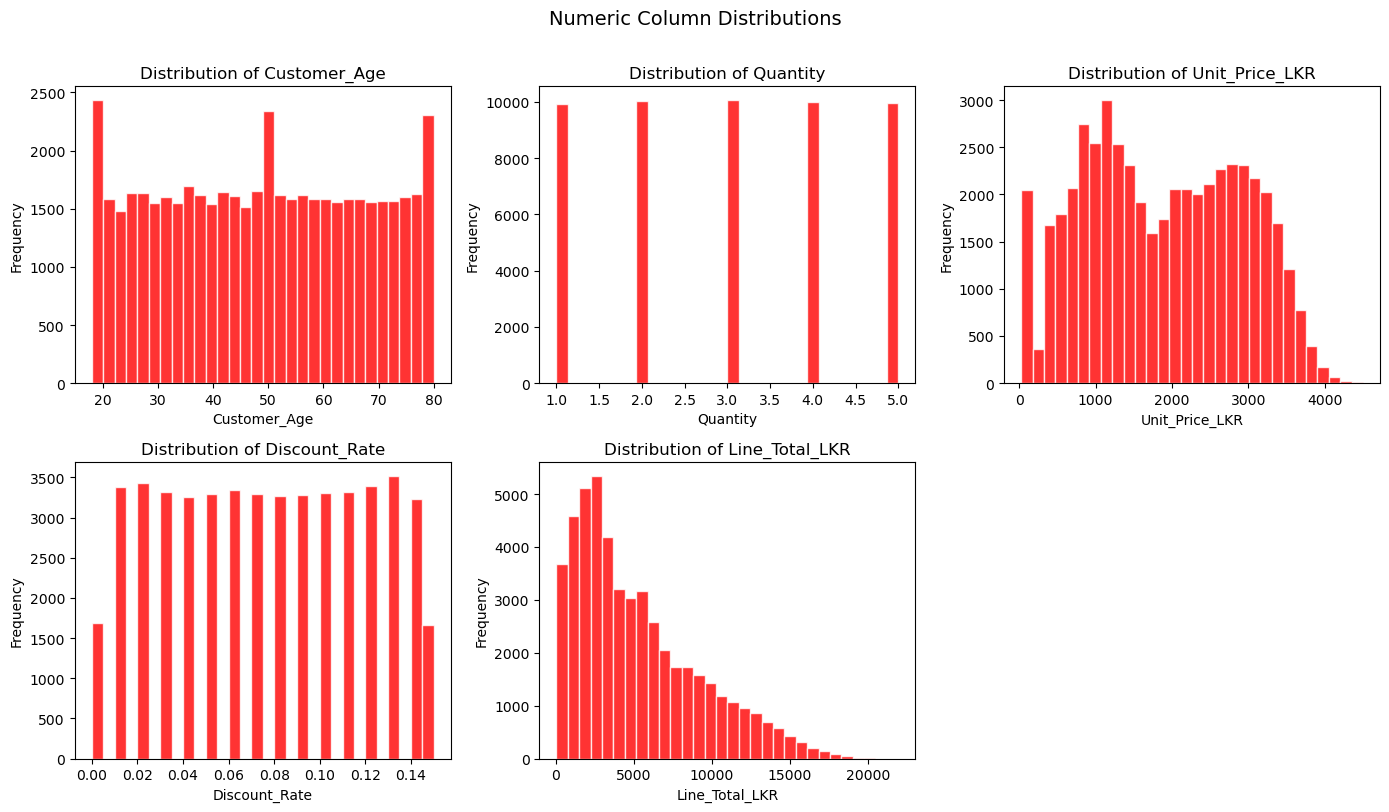

In [86]:
#numerical colomns 

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(sales[col].dropna(), bins=30, color="red",
                 edgecolor="white", alpha=0.8)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

axes[5].set_visible(False)

plt.suptitle("Numeric Column Distributions", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

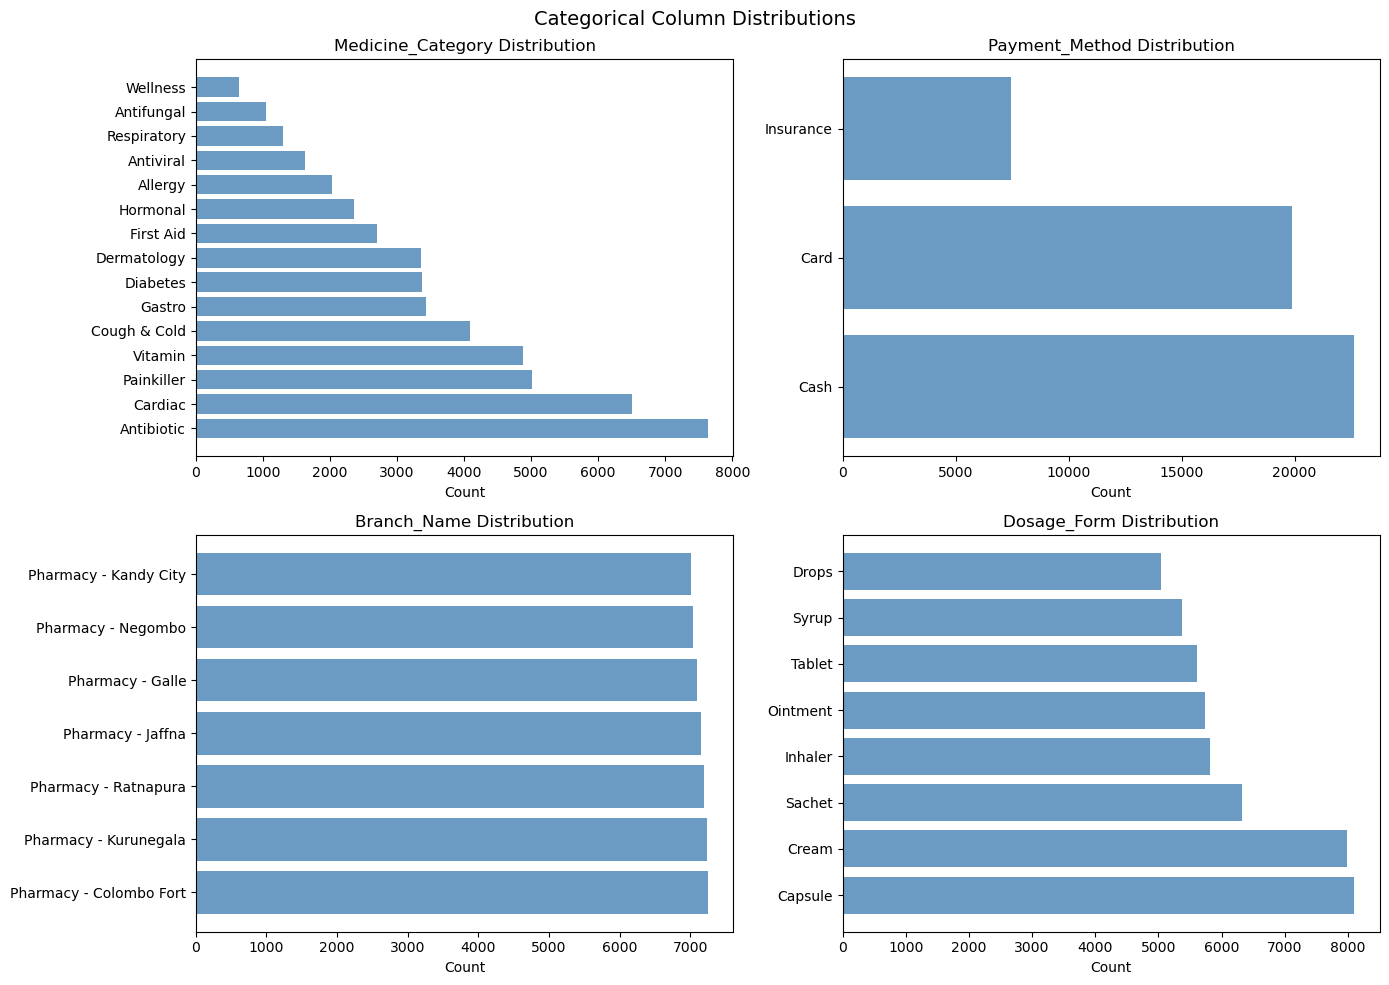

In [87]:
#cateforical colomns EDA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(["Medicine_Category", "Payment_Method","Branch_Name", "Dosage_Form"]):
    counts = sales[col].value_counts()
    axes[i].barh(counts.index, counts.values, color="steelblue", alpha=0.8)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("Count")

plt.suptitle("Categorical Column Distributions", fontsize=14)
plt.tight_layout()
plt.show()

**correlation check**

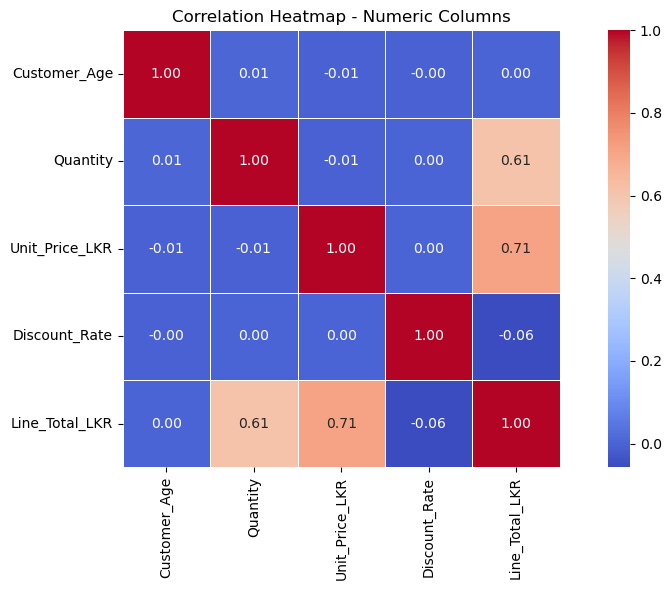

In [88]:
plt.figure(figsize=(10, 6))
correlation = sales[num_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm",linewidths=0.5, square=True)
plt.title("Correlation Heatmap - Numeric Columns")
plt.tight_layout()
plt.show()

In [89]:
sales["Transaction_Date"] = pd.to_datetime(sales["Transaction_Date"], errors="coerce")
sales["Expiry_Date"] = pd.to_datetime(sales["Expiry_Date"], errors="coerce")
sales["Day_of_Week"] = sales["Transaction_Date"].dt.day_name()
sales["Quarter"] = "Q" + sales["Transaction_Date"].dt.quarter.astype(str)
sales["Month_Name"] = sales["Transaction_Date"].dt.strftime("%B")  # Full month name
sales["Days_to_Expiry"] = (sales["Expiry_Date"] - sales["Transaction_Date"]).dt.days
bins = [0, 30, 45, 60, 100]
labels = ["Young (18-30)", "Middle (31-45)", "Senior (46-60)", "Elderly (61+)"]
sales["Age_Group"] = pd.cut(sales["Customer_Age"], bins=bins, labels=labels, right=True)
sales["Branch_Short"] = sales["Branch_Name"].str.replace("Pharmacy - ", "", regex=False)


In [90]:
#Revenue check

sales["Revenue_Check"] = (sales["Quantity"] * sales["Unit_Price_LKR"] * (1 - sales["Discount_Rate"])).round(2)
mismatch = (sales["Revenue_Check"] - sales["Line_Total_LKR"]).abs() > 0.05
print(f"Revenue verification: {mismatch.sum()} mismatched rows")
sales.drop(columns=["Revenue_Check"], inplace=True)

Revenue verification: 0 mismatched rows


In [91]:
#Finalnull check after data cleaning
print(sales.isnull().sum())

Transaction_ID           0
Transaction_Date         0
Branch_ID                0
Branch_Name              0
District                 0
Province                 0
Payment_Method           0
Customer_Gender          0
Customer_Age             0
Customer_City            0
Medicine_ID              0
Medicine_Name            0
Generic_Name             0
Medicine_Category        0
Dosage_Form              0
Pack_Size                0
Supplier_Name            0
Prescription_Required    0
Batch_No                 0
Expiry_Date              0
Quantity                 0
Unit_Price_LKR           0
Discount_Rate            0
Line_Total_LKR           0
Year                     0
Month                    0
Day_of_Week              0
Quarter                  0
Month_Name               0
Days_to_Expiry           0
Age_Group                0
Branch_Short             0
dtype: int64


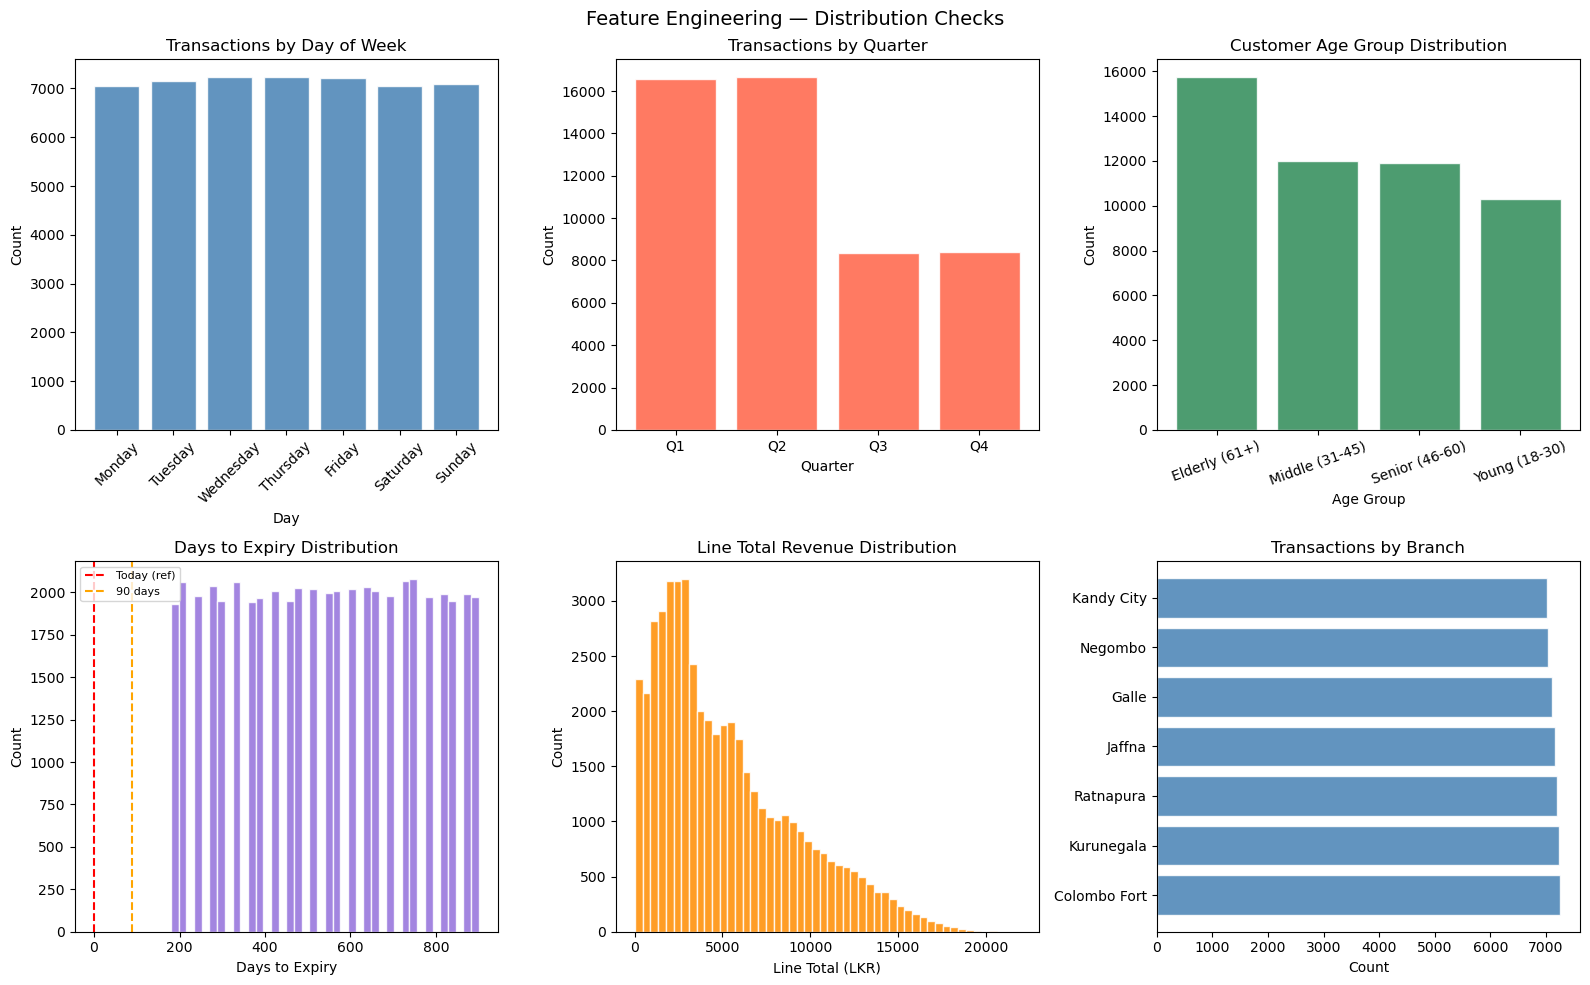

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Feature Engineering — Distribution Checks", fontsize=14)

# Day of week distribution
day_order = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
day_counts = sales["Day_of_Week"].value_counts().reindex(day_order)
axes[0,0].bar(day_counts.index, day_counts.values,color="steelblue", edgecolor="white", alpha=0.85)
axes[0,0].set_title("Transactions by Day of Week")
axes[0,0].set_xlabel("Day")
axes[0,0].set_ylabel("Count")
axes[0,0].tick_params(axis="x", rotation=45)

# Quarter distribution
q_counts = sales["Quarter"].value_counts().sort_index()
axes[0,1].bar(q_counts.index, q_counts.values,color="tomato", edgecolor="white", alpha=0.85)
axes[0,1].set_title("Transactions by Quarter")
axes[0,1].set_xlabel("Quarter")
axes[0,1].set_ylabel("Count")

# Age group distribution
age_counts = sales["Age_Group"].value_counts()
axes[0,2].bar(age_counts.index.astype(str), age_counts.values,color="seagreen", edgecolor="white", alpha=0.85)
axes[0,2].set_title("Customer Age Group Distribution")
axes[0,2].set_xlabel("Age Group")
axes[0,2].set_ylabel("Count")
axes[0,2].tick_params(axis="x", rotation=20)

# Days to expiry distribution
axes[1,0].hist(sales["Days_to_Expiry"].dropna(), bins=40,color="mediumpurple", edgecolor="white", alpha=0.85)
axes[1,0].axvline(0, color="red", linestyle="--",linewidth=1.5, label="Today (ref)")
axes[1,0].axvline(90, color="orange", linestyle="--",linewidth=1.5, label="90 days")
axes[1,0].set_title("Days to Expiry Distribution")
axes[1,0].set_xlabel("Days to Expiry")
axes[1,0].set_ylabel("Count")
axes[1,0].legend(fontsize=8)

# Total Revenue distribution
axes[1,1].hist(sales["Line_Total_LKR"], bins=50,color="darkorange", edgecolor="white", alpha=0.85)
axes[1,1].set_title("Line Total Revenue Distribution")
axes[1,1].set_xlabel("Line Total (LKR)")
axes[1,1].set_ylabel("Count")

# transaction count by branch
b_counts = sales["Branch_Short"].value_counts()
axes[1,2].barh(b_counts.index, b_counts.values,color="steelblue", edgecolor="white", alpha=0.85)
axes[1,2].set_title("Transactions by Branch")
axes[1,2].set_xlabel("Count")

plt.tight_layout()
plt.savefig("eda_stage3_features.png", dpi=150, bbox_inches="tight")
plt.show()

In [93]:
sales.to_csv("pharmacy_cleaned.csv", index=False)
#from here ownwards i am going to proceed with cleaned data
sales_cleaned = pd.read_csv("pharmacy_cleaned.csv") #so this will be used in tableau for creating dashboards

**Branding**

In [137]:
#font
plt.rcParams["font.family"]   = "Helvetica Neue"
plt.rcParams["font.size"]     = 10
plt.rcParams["axes.titlesize"]= 13
plt.rcParams["axes.labelsize"]= 10

#color palette
TEAL    = "#0A7B8E"   # main lines, branches, primary elements
CORAL   = "#E85D54"   # decline, risk, alert, trough
GOLD    = "#E8A838"   # trend lines, annotations, highlights
MINT    = "#3CB878"   # growth, positive, peak
PLUM    = "#7B4F9E"   # 3rd category, supporting elements
SLATE   = "#3D5166"   # separators, reference lines
AMBER   = "#D4620A"  
BG      = "#F0F4F8"   # all figure backgrounds
PANEL   = "#FFFFFF"   # all plot area backgrounds
GRID    = "#D8E4EC"   # all grid lines and spines


# Text
TEXT    = "#1A2B3C"   # titles, annotations
SUBTLE  = "#5A7080"   # axis labels, subtitles, captions


CAT_COLORS = [TEAL, CORAL, GOLD, MINT, PLUM,
              SLATE, AMBER, "#12A4BB", "#F28C88",
              "#F5CC7A", "#7ED4A3", "#B08DC7",
              "#6D8BA4", "#F09050", "#C94F7C"]

BRANCH_COLORS = {
    "Colombo Fort": TEAL,
    "Galle":        CORAL,
    "Jaffna":       GOLD,
    "Kandy City":   MINT,
    "Kurunegala":   PLUM,
    "Negombo":      AMBER,
    "Ratnapura":    SLATE,
}

In [132]:
#style function

def style_ax(ax, xlabel="", ylabel="",
             grid_axis="y", spines=("bottom", "left")):
    """Apply consistent styling to any axes object"""
    ax.set_facecolor(PANEL)
    ax.tick_params(colors=SUBTLE, labelsize=9)
    for sp in ax.spines:
        ax.spines[sp].set_visible(sp in spines)
        if sp in spines:
            ax.spines[sp].set_color(GRID)
            ax.spines[sp].set_linewidth(0.8)
    if grid_axis:
        ax.grid(axis=grid_axis, color=GRID,
                linewidth=0.55, linestyle="--",
                alpha=0.8, zorder=0)
        ax.set_axisbelow(True)
    if xlabel:
        ax.set_xlabel(xlabel, color=SUBTLE,
                      fontsize=9, labelpad=6)
    if ylabel:
        ax.set_ylabel(ylabel, color=SUBTLE,
                      fontsize=9, labelpad=6)

In [135]:
#title function
def fig_header(fig, title, subtitle=""):
    """Add consistent title and subtitle to figure"""
    fig.text(0.04, 0.977, title,
             fontsize=15, fontweight="bold",
             color=TEXT, va="top")
    if subtitle:
        fig.text(0.04, 0.945, subtitle,
                 fontsize=9, color=SUBTLE,
                 va="top", style="italic")

**Time Series Revenue Trend**

In [129]:
sales_cleaned["Transaction_Date"] = pd.to_datetime(sales_cleaned["Transaction_Date"])

#grouping transaction date based on month
monthly = sales_cleaned.groupby(sales_cleaned["Transaction_Date"].dt.to_period("M"))["Line_Total_LKR"].sum()
monthly.index = monthly.index.to_timestamp() 


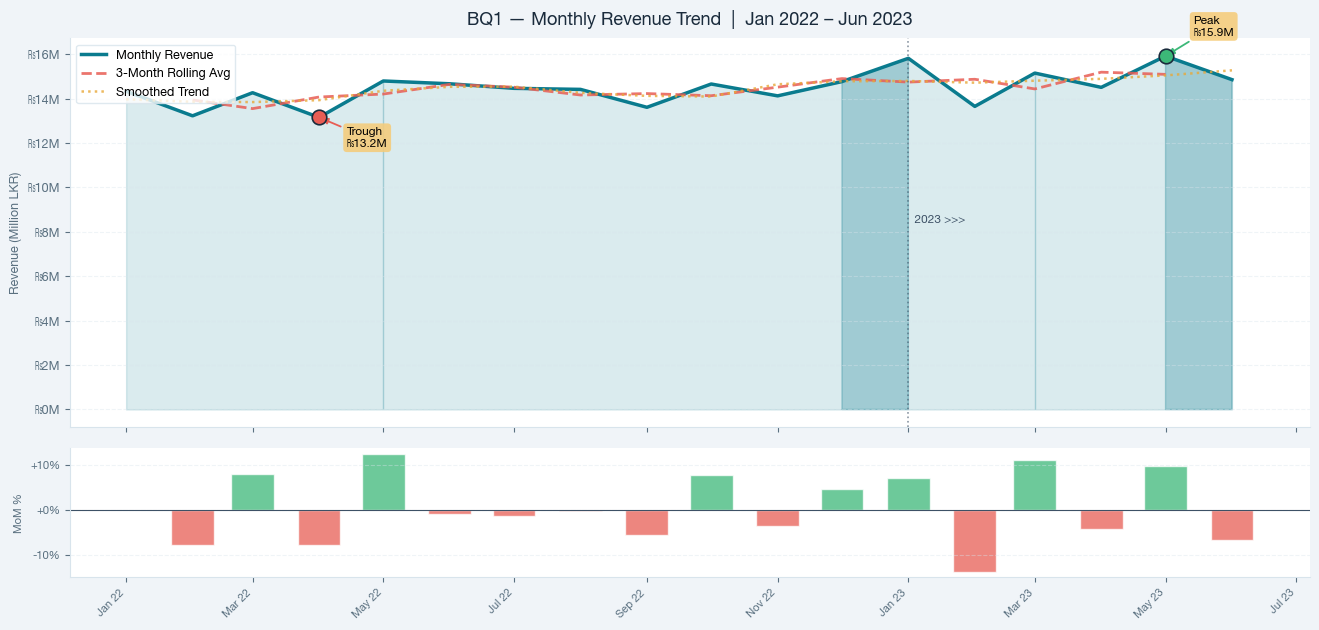

In [138]:
rolling_avg = monthly.rolling(window=3, center=True).mean() #rolling average calculation for 3 consecutive month together, center : plotted at middle
mom_pct     = monthly.pct_change() * 100  #MoM percentage change

trend = savgol_filter(monthly.values / 1e6, window_length=7, polyorder=2)#smooth trend line

fig = plt.figure(figsize=(16, 7))
fig.patch.set_facecolor(BG)   
gs  = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.08)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)  

ax1.set_facecolor(PANEL)          
ax2.set_facecolor(PANEL)  
rev = monthly.values / 1e6
ax1.fill_between(monthly.index, rev, alpha=0.15, color=TEAL)

p70 = np.percentile(rev, 70)
ax1.fill_between(monthly.index, rev,where=rev > p70,alpha=0.28, color=TEAL)
ax1.plot(monthly.index, rev,color=TEAL, linewidth=2.5,label="Monthly Revenue")

ax1.plot(monthly.index, rolling_avg.values / 1e6,color=CORAL, 
         linewidth=2,linestyle="--", alpha=0.85,label="3-Month Rolling Avg")
ax1.plot(monthly.index, trend,color=GOLD, linewidth=1.8,
         linestyle=":", alpha=0.8,label="Smoothed Trend")

peak_idx   = int(np.argmax(rev))
trough_idx = int(np.argmin(rev))

for idx, label, color, dy in [
    (peak_idx,   "Peak",   MINT, 0.5),
    (trough_idx, "Trough", CORAL,  -0.7)
]:
    ax1.scatter(monthly.index[idx], rev[idx],
                s=110, color=color, zorder=6,
                edgecolors=TEXT, linewidths=1.2)
    ax1.annotate(
        f"{label}\n₨{rev[idx]:.1f}M",
        xy=(monthly.index[idx], rev[idx]),
        xytext=(20, dy * 30),
        textcoords="offset points",
        fontsize=8.5,
        arrowprops=dict(arrowstyle="-|>", color=color,
                        lw=1.3, mutation_scale=9),
        bbox=dict(boxstyle="round,pad=0.3",
                  fc="#F5CC7A", ec="none", alpha=0.88)
    )

sep_date = pd.Timestamp("2023-01-01")
ax1.axvline(sep_date, color=SLATE, linewidth=1.2,
            linestyle=":", alpha=0.6)
ax1.text(sep_date, rev.max() * 0.53,
         "  2023 >>>", fontsize=8.5,
         color=SLATE, style="italic")



ax1.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"₨{v:.0f}M"))
ax1.set_ylabel("Revenue (Million LKR)", fontsize=9,color=SUBTLE)
ax1.tick_params(colors=SUBTLE, labelsize=9) 
ax1.grid(axis="y",color=GRID, linestyle="--", alpha=0.4)
ax1.legend(loc="upper left", fontsize=9,edgecolor=GRID)

for sp in ["top", "right"]:                
    ax1.spines[sp].set_visible(False)
for sp in ["bottom", "left"]:
    ax1.spines[sp].set_color(GRID)

    
ax1.set_title("BQ1 — Monthly Revenue Trend  |  Jan 2022 – Jun 2023",
              fontsize=13, pad=10,color=TEXT)


plt.setp(ax1.get_xticklabels(), visible=False)

bar_colors = [MINT if v >= 0 else CORAL for v in mom_pct]
ax2.bar(monthly.index, mom_pct.values,
        color=bar_colors, alpha=0.75,
        width=20, edgecolor="white")
ax2.axhline(0, color=SLATE, linewidth=0.8)
ax2.set_ylabel("MoM %", fontsize=8, color=SUBTLE)
ax2.tick_params(colors=SUBTLE, labelsize=8)    
ax2.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f"{v:+.0f}%"))
ax2.grid(axis="y", linestyle="--", alpha=0.4,color=GRID)

for sp in ["top", "right"]:              
    ax2.spines[sp].set_visible(False)
for sp in ["bottom", "left"]:
    ax2.spines[sp].set_color(GRID)
    
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", fontsize=8)

plt.subplots_adjust()
plt.show()







**GIS**

In [96]:
sales_cleaned["Branch_Short"] = sales_cleaned["Branch_Name"].str.replace(
    "Pharmacy - ", "", regex=False)

branch_stats = sales_cleaned.groupby("Branch_Short").agg(
    Revenue=("Line_Total_LKR", "sum"),
    Transactions=("Transaction_ID", "count"),
    AvgTicket=("Line_Total_LKR", "mean"),
    AvgDiscount=("Discount_Rate", "mean"),
    TopCategory=("Medicine_Category",
                 lambda x: x.value_counts().index[0])
).reset_index()

city_stats = sales_cleaned.groupby("Customer_City").agg(
    Revenue=("Line_Total_LKR", "sum"),
    Transactions=("Transaction_ID", "count"),
    AvgAge=("Customer_Age", "mean"),
    TopPayment=("Payment_Method",
                lambda x: x.value_counts().index[0])
).reset_index()



In [97]:

branch_coords = {
    "Colombo Fort": (6.9355, 79.8507),
    "Negombo":      (7.2081, 79.8358),
    "Kandy City":   (7.2906, 80.6337),
    "Galle":        (6.0535, 80.2210),
    "Jaffna":       (9.6615, 80.0255),
    "Kurunegala":   (7.4818, 80.3609),
    "Ratnapura":    (6.6828, 80.3992),
}

city_coords = {
    "Colombo":    (6.9271, 79.8612),
    "Kandy":      (7.2906, 80.6337),
    "Galle":      (6.0535, 80.2210),
    "Jaffna":     (9.6615, 80.0255),
    "Kurunegala": (7.4818, 80.3609),
    "Matara":     (5.9549, 80.5550),
    "Negombo":    (7.2081, 79.8358),
    "Ratnapura":  (6.6828, 80.3992),
}


In [112]:
m = folium.Map(location=[7.8731, 80.7718],
               zoom_start=7,
               tiles=None)

folium.TileLayer("CartoDB positron",
                 name="Base Map").add_to(m)
MiniMap(toggle_display=True).add_to(m)
Fullscreen().add_to(m)

In [113]:
branch_layer = folium.FeatureGroup(name="Pharmacy Branches",show=True)
max_rev = branch_stats["Revenue"].max()

for _, row in branch_stats.iterrows():
    branch = row["Branch_Short"]
    if branch not in branch_coords:
        continue
    lat, lon = branch_coords[branch]

    radius = (row["Revenue"] / max_rev) * 35 + 12

    popup_html = f"""
    <div style='font-family: Arial; width: 220px;'>
        <h4 style='color: #0A7B8E; margin:0;'>
            Branch: {branch}
        </h4>
        <hr style='margin:5px 0; border-color:#0A7B8E;'>
        <table style='width:100%; font-size:12px;'>
            <tr>
                <td><b>Revenue</b></td>
                <td>₨{row['Revenue']/1e6:.1f}M</td>
            </tr>
            <tr>
                <td><b>Transactions</b></td>
                <td>{int(row['Transactions']):,}</td>
            </tr>
            <tr>
                <td><b>Avg Ticket</b></td>
                <td>₨{row['AvgTicket']:,.0f}</td>
            </tr>
            <tr>
                <td><b>Avg Discount</b></td>
                <td>{row['AvgDiscount']*100:.1f}%</td>
            </tr>
            <tr>
                <td><b>Top Category</b></td>
                <td>{row['TopCategory']}</td>
            </tr>
        </table>
    </div>
    """
    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color="white",
        weight=2,
        fill=True,
        fill_color="#E8A838",
        fill_opacity=0.85,
        popup=folium.Popup(popup_html, max_width=240),
        tooltip=f"🏥 {branch} | ₨{row['Revenue']/1e6:.1f}M"
    ).add_to(branch_layer)       # ✨ NEW - add to layer not map

branch_layer.add_to(m)


In [114]:
city_layer = folium.FeatureGroup(name="Customer Cities",show=True)
max_city_rev = city_stats["Revenue"].max()

for _, row in city_stats.iterrows():
    city = row["Customer_City"]
    if city not in city_coords:
        continue
    lat, lon = city_coords[city]

    radius = (row["Revenue"] / max_city_rev) * 20 + 8

    popup_html = f"""
    <div style='font-family: Arial; width: 200px;'>
        <h4 style='color: #E85D54; margin:0;'>
            👥 {city}
        </h4>
        <hr style='margin:5px 0; border-color:#E85D54;'>
        <table style='width:100%; font-size:12px;'>
            <tr>
                <td><b>Revenue</b></td>
                <td>₨{row['Revenue']/1e6:.1f}M</td>
            </tr>
            <tr>
                <td><b>Transactions</b></td>
                <td>{int(row['Transactions']):,}</td>
            </tr>
            <tr>
                <td><b>Avg Customer Age</b></td>
                <td>{row['AvgAge']:.0f} years</td>
            </tr>
            <tr>
                <td><b>Top Payment</b></td>
                <td>{row['TopPayment']}</td>
            </tr>
        </table>
    </div>
    """
    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color="white",
        weight=2,
        fill=True,
        fill_color="#E85D54",
        fill_opacity=0.75,
        popup=folium.Popup(popup_html, max_width=220),
        tooltip=f"{city} | {int(row['Transactions']):,} txns"
    ).add_to(city_layer)  

city_layer.add_to(m)

folium.LayerControl(position="topright",collapsed=False).add_to(m)

title_html = """
<div style='position: fixed; top: 10px; left: 50%;
     transform: translateX(-50%); z-index: 1000;
     background: white; padding: 8px 16px;
     border-radius: 8px; border: 2px solid #0A7B8E;
     font-family: Arial;
     box-shadow: 2px 2px 6px rgba(0,0,0,0.2);'>
    <b style='color: #0A7B8E; font-size: 14px;'>
        Sri Lanka Pharmacy Revenue Map
    </b><br>
    <span style='color: grey; font-size: 11px;'>
        🟡 Branches &nbsp;|&nbsp;
        🔴 Customer Cities &nbsp;|&nbsp;
        Jan 2022 – Jun 2023
    </span>
</div>
"""
m.get_root().html.add_child(folium.Element(title_html))

In [115]:
display(m)

**Profit category scatter plot**

In [102]:
cat_stats = sales_cleaned.groupby("Medicine_Category").agg(
    Revenue=("Line_Total_LKR", "sum"),
    Transactions=("Transaction_ID", "count"),
    AvgDiscount=("Discount_Rate", "mean")
).reset_index()

#scale bubble by transaction count
sizes = (cat_stats["Transactions"] / cat_stats["Transactions"].max() * 2000 + 200)

#color
colors = ["steelblue", "tomato", "goldenrod", "seagreen",
          "mediumpurple", "darkorange", "teal", "crimson",
          "olive", "slategrey", "royalblue", "coral",
          "darkgreen", "peru", "orchid"]


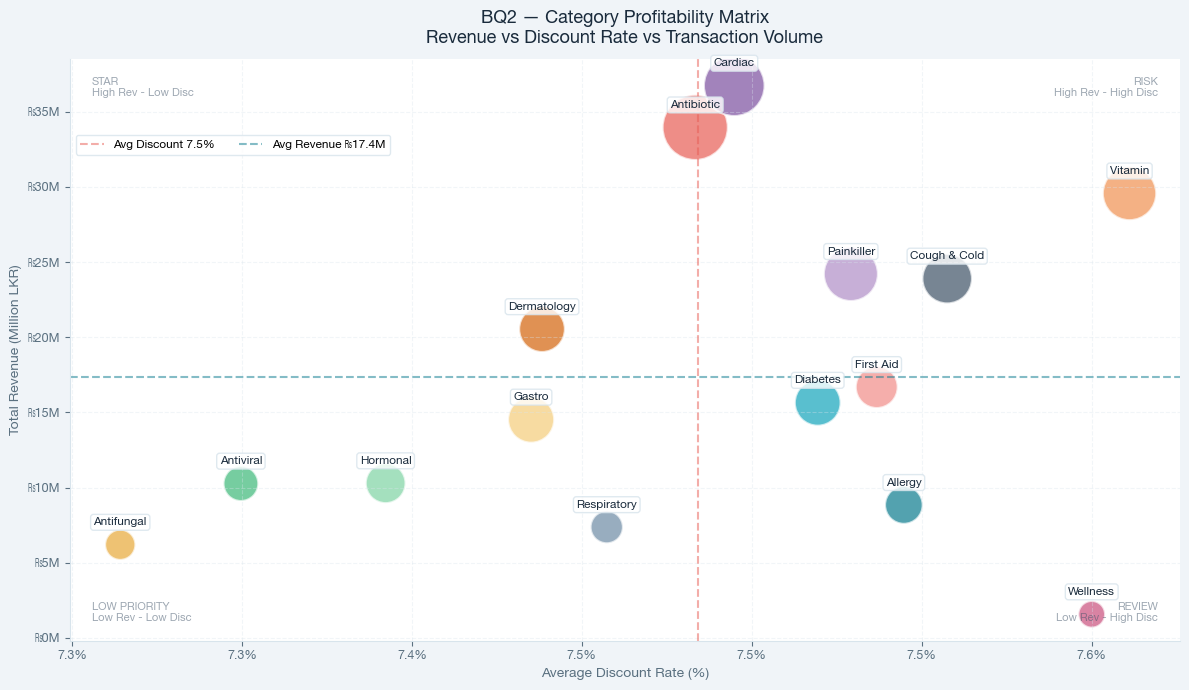

In [148]:
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(BG)                        
ax.set_facecolor(PANEL)                        


ax.scatter(cat_stats["AvgDiscount"] * 100,
           cat_stats["Revenue"] / 1e6,
           s=sizes,
          c=CAT_COLORS[:len(cat_stats)],
           alpha=0.7,
           edgecolors="white",
           linewidths=1.5)
#code for category on each label of bubble
for _, row in cat_stats.iterrows():
    ax.annotate(row["Medicine_Category"],
                xy=(row["AvgDiscount"] * 100, row["Revenue"] / 1e6),
                xytext=(0, 14),
                textcoords="offset points",
                ha="center", fontsize=8.5,
                fontweight="bold",
                color=TEXT, 
                bbox=dict(boxstyle="round,pad=0.25",fc="white", ec=GRID,alpha=0.80))

#reference lines for averages
avg_discount = cat_stats["AvgDiscount"].mean() * 100
avg_revenue  = cat_stats["Revenue"].mean() / 1e6

ax.axvline(avg_discount, color=CORAL, linestyle="--",
           alpha=0.5, label=f"Avg Discount {avg_discount:.1f}%")
ax.axhline(avg_revenue, color=TEAL, linestyle="--",
           alpha=0.5, label=f"Avg Revenue ₨{avg_revenue:.1f}M")

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
quadrant_labels = [
    ("STAR\nHigh Rev - Low Disc",        0.02, 0.97, "left",  "top"),
    ("RISK\nHigh Rev - High Disc",       0.98, 0.97, "right", "top"),
    ("LOW PRIORITY\nLow Rev - Low Disc", 0.02, 0.03, "left",  "bottom"),
    ("REVIEW\nLow Rev - High Disc",      0.98, 0.03, "right", "bottom"),
]

for label, x, y, ha, va in quadrant_labels:
    ax.text(x, y, label,
            transform=ax.transAxes,
            fontsize=8, color=SLATE,
            alpha=0.5, ha=ha, va=va,
            style="italic")


# Labels and formatting
ax.set_title("BQ2 — Category Profitability Matrix\n"
             "Revenue vs Discount Rate vs Transaction Volume",
             fontsize=13, pad=12,color=TEXT)
ax.set_xlabel("Average Discount Rate (%)", fontsize=10,color=SUBTLE)
ax.set_ylabel("Total Revenue (Million LKR)", fontsize=10,color=SUBTLE)
ax.tick_params(colors=SUBTLE, labelsize=9)  
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda v, _: f"₨{v:.0f}M"))
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda v, _: f"{v:.1f}%"))
ax.legend(fontsize=8.5, loc="upper left",
          bbox_to_anchor=(0.0, 0.88),edgecolor=GRID,
          framealpha=0.8, ncol=2)
ax.grid(axis="both", linestyle="--", alpha=0.35,color=GRID)

for sp in ["top", "right"]:                   
    ax.spines[sp].set_visible(False)
for sp in ["bottom", "left"]:
    ax.spines[sp].set_color(GRID)
    
plt.tight_layout()
plt.savefig("BQ2_stage3.png", dpi=150, bbox_inches="tight",facecolor=BG)
plt.show()

**Radar Chart**

In [104]:

branch_kpi = sales_cleaned.groupby("Branch_Short").agg(
    Revenue=("Line_Total_LKR", "sum"),
    Transactions=("Transaction_ID", "count"),
    AvgTicket=("Line_Total_LKR", "mean"),
    AvgDiscount=("Discount_Rate", "mean"),
    PrescRatio=("Prescription_Required", lambda x: (x == "Yes").mean()),
    UniqueCategories=("Medicine_Category", "nunique"),
).reset_index()

# Normalise 0 -1
kpis = ["Revenue", "Transactions", "AvgTicket",
        "PrescRatio", "UniqueCategories"]


In [105]:
for col in kpis:
    mn, mx = branch_kpi[col].min(), branch_kpi[col].max()
    if mx > mn:  
        branch_kpi[f"N_{col}"] = (branch_kpi[col] - mn) / (mx - mn)
    else:
        branch_kpi[f"N_{col}"] = 0.5  

mn, mx = branch_kpi["AvgDiscount"].min(), branch_kpi["AvgDiscount"].max()
if mx > mn:
    branch_kpi["N_MarginScore"] = 1 - (branch_kpi["AvgDiscount"] - mn) / (mx - mn)
else:
    branch_kpi["N_MarginScore"] = 0.5

# Radar settings
radar_cols   = ["N_Revenue", "N_Transactions", "N_AvgTicket",
                "N_PrescRatio", "N_UniqueCategories", "N_MarginScore"]
radar_labels = ["Revenue", "Transactions", "Avg Ticket",
                "Rx Ratio", "Cat. Mix", "Margin Score"]

angles = np.linspace(0, 2 * np.pi, len(radar_labels),
                     endpoint=False).tolist()
angles += angles[:1]

colors = ["steelblue", "tomato", "goldenrod", "seagreen",
          "mediumpurple", "darkorange", "teal"]


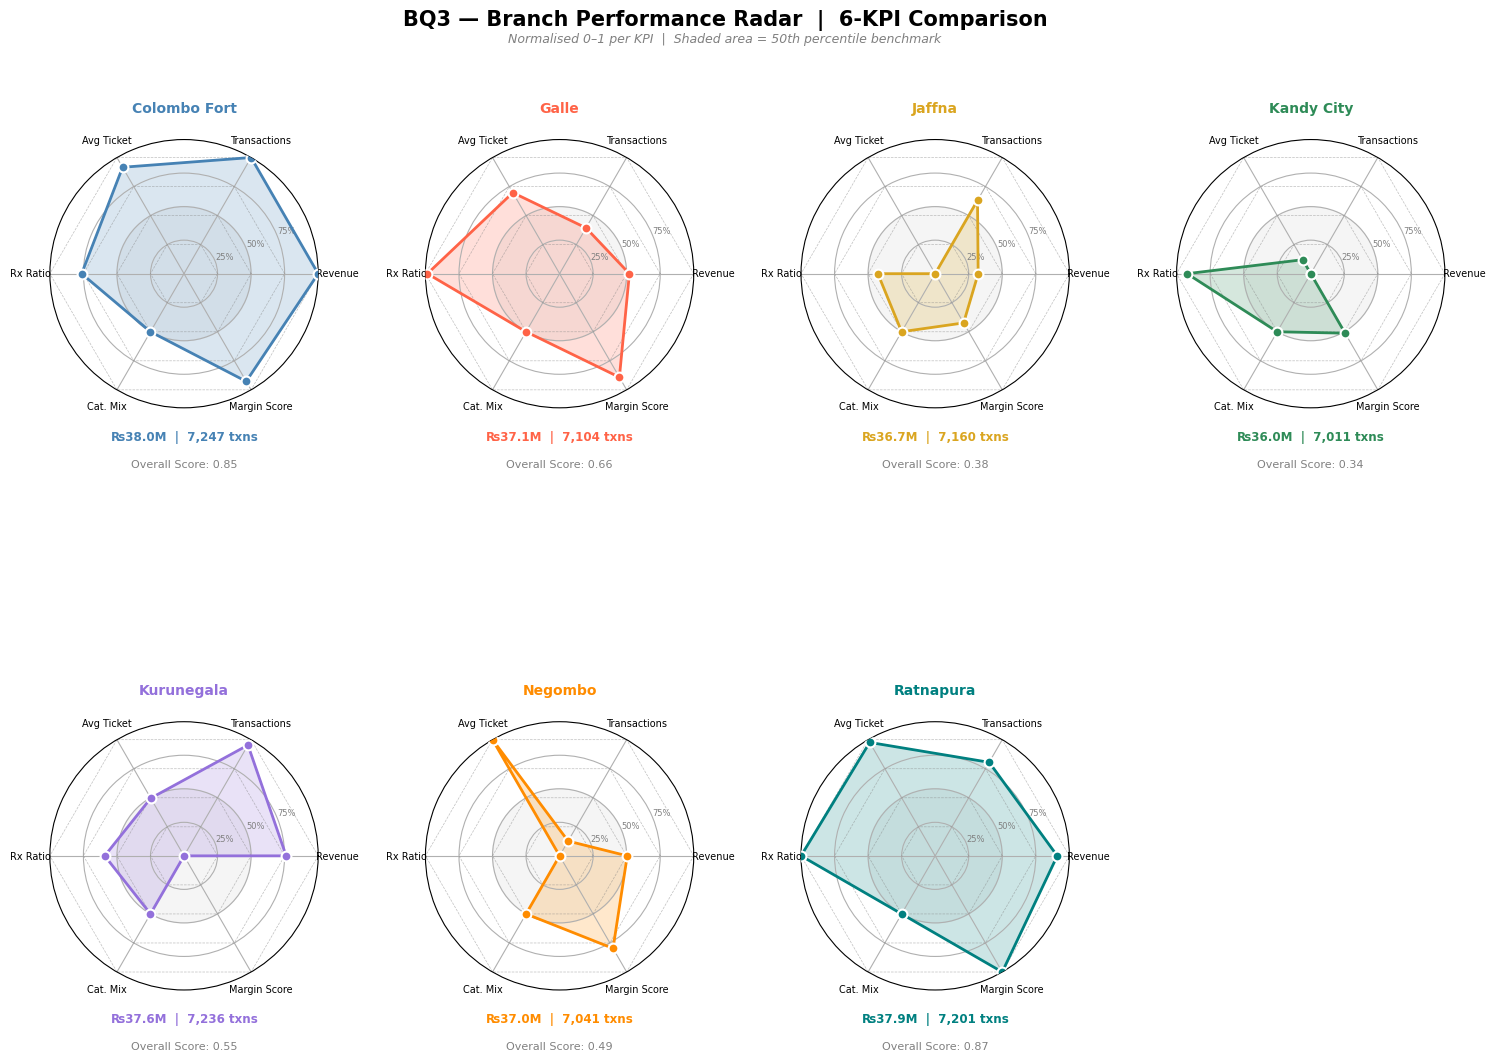

In [106]:

fig, axes = plt.subplots(2, 4, figsize=(18, 11),subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, (_, row) in enumerate(branch_kpi.iterrows()):
    ax    = axes[idx]
    color = colors[idx]

    values  = [row[k] for k in radar_cols]
    values += values[:1]

    # Background rings
    for r in [0.25, 0.5, 0.75, 1.0]:
        ax.plot(angles, [r] * len(angles),
                color="grey", linewidth=0.5,
                linestyle="--", alpha=0.5)

    theta = np.linspace(0, 2 * np.pi, 100)
    ax.fill(theta, [0.5] * 100,
            color="grey", alpha=0.08)

    ax.plot(angles, values, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.2)
    ax.scatter(angles[:-1], values[:-1],s=50, color=color, zorder=5,edgecolors="white", linewidths=1.5)

    # Axis labels
    ax.set_thetagrids(np.degrees(angles[:-1]),
                      radar_labels, fontsize=7)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.25, 0.5, 0.75])
    ax.set_yticklabels(["25%", "50%", "75%"],
                       fontsize=6, color="grey")
    ax.set_title(row["Branch_Short"], fontsize=10,
                 fontweight="bold", color=color, pad=20)
    ax.text(0.5, -0.12,
            f"₨{row['Revenue']/1e6:.1f}M  |  {int(row['Transactions']):,} txns",
            transform=ax.transAxes, ha="center",fontsize=8.5, color=color, fontweight="bold")

    overall = np.mean([row[k] for k in radar_cols])
    ax.text(0.5, -0.22,
            f"Overall Score: {overall:.2f}",
            transform=ax.transAxes, ha="center",
            fontsize=8, color="grey")


axes[-1].set_visible(False)


fig.suptitle("BQ3 — Branch Performance Radar  |  6-KPI Comparison",
             fontsize=15, fontweight="bold", y=1.01)
fig.text(0.5, 0.98,
         "Normalised 0–1 per KPI  |  Shaded area = 50th percentile benchmark",
         ha="center", fontsize=9, color="grey", style="italic")

plt.subplots_adjust(top=0.93, bottom=0.08, hspace=0.65, wspace=0.4)
plt.savefig("BQ3_stage3.png", dpi=150, bbox_inches="tight")
plt.show()

**Violin Plot**

In [107]:
#top 5 categories by revenue
top5 = (sales_cleaned.groupby("Medicine_Category")["Line_Total_LKR"].sum().nlargest(5).index.tolist())

In [108]:
sales_cleaned5 = sales_cleaned[sales_cleaned["Medicine_Category"].isin(top5)] # i only need to show top 5 only

In [109]:
colors = ["steelblue", "tomato", "goldenrod","seagreen", "mediumpurple"]

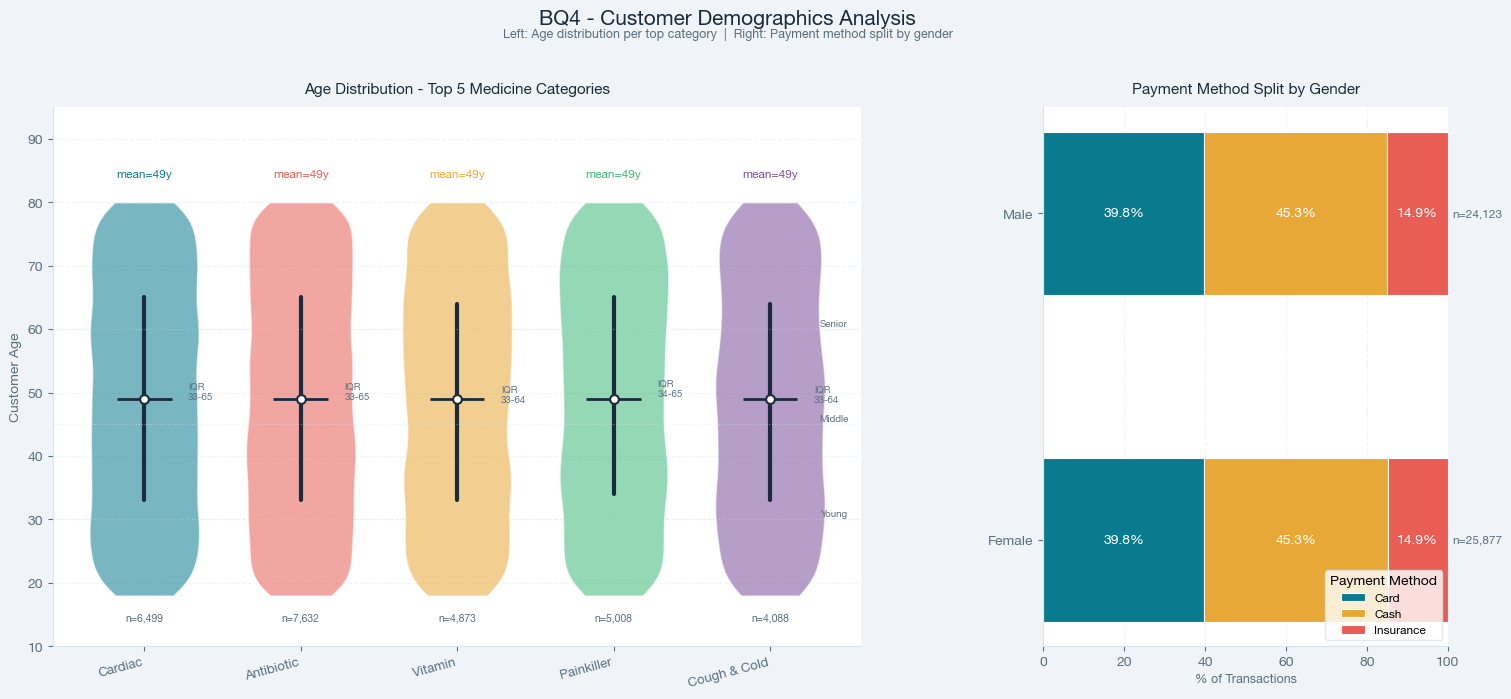

In [154]:
fig = plt.figure(figsize=(18, 7))
fig.patch.set_facecolor(BG)
gs  = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax1.set_facecolor(PANEL)
ax2.set_facecolor(PANEL)

# ── Left panel: Violin ───────────────────────────────────────────
age_data = [sales_cleaned5[sales_cleaned5["Medicine_Category"] == cat]["Customer_Age"].values
            for cat in top5]

parts = ax1.violinplot(age_data,
                       positions=range(len(top5)),
                       widths=0.7,
                       showmedians=True,
                       showextrema=False)

for i, (pc, color) in enumerate(zip(parts["bodies"], CAT_COLORS)):
    pc.set_facecolor(color)
    pc.set_alpha(0.55)
    pc.set_edgecolor("white")

parts["cmedians"].set_color(TEXT)
parts["cmedians"].set_linewidth(2)

for i, (cat, color) in enumerate(zip(top5, CAT_COLORS)):
    ages = sales_cleaned5[sales_cleaned5["Medicine_Category"] == cat]["Customer_Age"]  # ✨ FIX - consistent df name
    q1, med, q3 = ages.quantile([0.25, 0.5, 0.75])

    ax1.plot([i, i], [q1, q3],
             color=TEXT, linewidth=3,
             solid_capstyle="round")
    ax1.scatter([i], [med], color=PANEL, s=40,
                zorder=5, edgecolors=TEXT,          # ✨ FIX - "black" → TEXT
                linewidths=1.5)
    ax1.text(i, ages.max() + 4,
             f"mean={ages.mean():.0f}y",
             ha="center", fontsize=8.5,
             color=color, fontweight="bold")
    ax1.text(i, ages.min() - 4,
             f"n={len(ages):,}",
             ha="center", fontsize=7.5,
             color=SUBTLE)
    ax1.text(i + 0.28, (q1 + q3) / 2,
             f"IQR\n{q1:.0f}-{q3:.0f}",            # ✨ FIX - unicode dash → plain hyphen
             ha="left", fontsize=7, color=SUBTLE)

ax1.set_ylim(10, 95)
ax1.set_xticks(range(len(top5)))
ax1.set_xticklabels(top5, rotation=15, ha="right",
                    fontsize=9.5, color=TEXT)
ax1.set_ylabel("Customer Age", fontsize=10, color=SUBTLE)
ax1.set_title("Age Distribution - Top 5 Medicine Categories",
              fontsize=11, pad=10, color=TEXT)
ax1.tick_params(colors=SUBTLE)
ax1.grid(axis="y", linestyle="--", alpha=0.4, color=GRID)
ax1.set_axisbelow(True)

for sp in ["top", "right"]:
    ax1.spines[sp].set_visible(False)
for sp in ["bottom", "left"]:
    ax1.spines[sp].set_color(GRID)

for age, label in [(30, "Young"), (45, "Middle"), (60, "Senior")]:
    ax1.axhline(age, color=GRID, linewidth=0.8,
                linestyle=":", alpha=0.5)
    ax1.text(len(top5) - 0.5, age + 0.5,
             label, fontsize=7, color=SUBTLE,
             style="italic", ha="right")

# ── Right panel: Gender x Payment ────────────────────────────────
gp = (sales_cleaned.groupby(["Customer_Gender", "Payment_Method"])
        .size()
        .unstack("Payment_Method")
        .fillna(0))
gp_pct = gp.div(gp.sum(axis=1), axis=0) * 100

pay_colors = [TEAL, GOLD, CORAL]
bottom = np.zeros(len(gp_pct))

# ✨ FIX - missing bar drawing loop added
for col, color in zip(gp_pct.columns, pay_colors):
    bars = ax2.barh(gp_pct.index, gp_pct[col],
                    left=bottom, color=color,
                    label=col, height=0.5,
                    edgecolor="white", linewidth=0.8)
    for bar, bv in zip(bars, bottom):
        w = bar.get_width()
        if w > 5:
            ax2.text(bv + w / 2,
                     bar.get_y() + bar.get_height() / 2,
                     f"{w:.1f}%", ha="center", va="center",
                     fontsize=10, color="white",
                     fontweight="bold")
    bottom += gp_pct[col].values

ax2.set_xlim(0, 100)
ax2.set_xlabel("% of Transactions", color=SUBTLE, fontsize=9)
ax2.set_title("Payment Method Split by Gender",
              fontsize=11, pad=10, color=TEXT)
ax2.tick_params(colors=SUBTLE)
ax2.grid(axis="x", color=GRID, linestyle="--", alpha=0.4)
ax2.set_axisbelow(True)

for sp in ["top", "right"]:
    ax2.spines[sp].set_visible(False)
for sp in ["bottom", "left"]:
    ax2.spines[sp].set_color(GRID)

# ✨ legend AFTER bars are drawn
ax2.legend(title="Payment Method",
           fontsize=8.5, loc="lower right",
           framealpha=0.8, edgecolor=GRID)

for i, gender in enumerate(gp_pct.index):
    total = int(gp.loc[gender].sum())
    ax2.text(101, i, f"n={total:,}",
             va="center", fontsize=8.5, color=SUBTLE)

# ── Titles ───────────────────────────────────────────────────────
fig.suptitle("BQ4 - Customer Demographics Analysis",
             fontsize=15, fontweight="bold",
             color=TEXT, y=1.02)
fig.text(0.5, 0.98,
         "Left: Age distribution per top category  "
         "|  Right: Payment method split by gender",
         ha="center", fontsize=9,
         color=SUBTLE, style="italic")

plt.savefig("BQ4_final.png", dpi=150,
            bbox_inches="tight", facecolor=BG)
plt.show()